In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

Combine the spreadsheets that are relevant to the cortical thickness. Let's only look at singleton data for now as twins may behave differently. Add a label for age in an attempt to cluster data by age.

In [2]:
master = pd.ExcelFile("CONTE_TWIN_CT_SA_tlaplace_Master.xlsx") # maybe excel -> matlab -> python

In [3]:
master.sheet_names

[u'ROIs',
 u'1_2_CONTE_CT_tlaplace_dROI',
 u'1_2_CONTE_SA_dROI',
 u'1_2_CONTE_TotalCT_SA',
 u'1_2_TWIN_CT_tlaplace_dROI',
 u'1_2_TWIN_SA_dROI',
 u'1_2_TWIN_TotalCT_SA',
 u'4_6_CONTE_CT_tlaplace_dROI',
 u'4_6_CONTE_SA_dROI',
 u'4_6_CONTE_TotalCT_SA',
 u'4_6_TWIN_CT_tlaplace_dROI',
 u'4_6_TWIN_SA_dROI',
 u'4_6_TWIN_TotalCT_SA']

In [4]:
ct1_2y = master.parse('1_2_TWIN_SA_dROI')
#ct1_2_twin = master.parse('1_2_TWIN_CT_tlaplace_dROI')
ct4_6y = master.parse('4_6_TWIN_SA_dROI')
#ct4_6_twin = master.parse('4_6_TWIN_CT_tlaplace_dROI')

In [5]:
ct1_2y.rename(columns={'ROI':'SubjectId'},inplace=True)
ct4_6y.rename(columns={'ROI':'SubjectId'},inplace=True)

# There is probably a better way to add the age column to each record based off the recordId
ct1y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("1yr"),:]
ones = pd.DataFrame(data=[1] * ct1y.shape[0], columns=["Age"])
ct1y = pd.concat([ct1y, ones] ,axis=1).dropna()
     
ct2y = ct1_2y.loc[ct1_2y['SubjectId'].str.contains("2yr"),:]
twos = pd.DataFrame(data=[2] * ct2y.shape[0], columns=["Age"])
ct2y = pd.concat([ct2y, twos] ,axis=1).dropna()

ct4y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("4yr"),:]
fours = pd.DataFrame(data=[4] * ct4y.shape[0], columns=["Age"])
ct4y = pd.concat([ct4y, fours] ,axis=1).dropna()

ct6y = ct4_6y.loc[ct4_6y['SubjectId'].str.contains("6yr"),:]
sixes = pd.DataFrame(data=[6] * ct6y.shape[0], columns=["Age"])
ct6y = pd.concat([ct6y, sixes] ,axis=1).dropna()

# Combine dataframe
ctdf = pd.concat([ct1y, ct2y, ct4y, ct6y], axis=0)
ctdf.head()

,SubjectId,11101,11102,11103,11104,11105,11106,11107,11108,11109,...,12167,12168,12169,12170,12171,12172,12173,12174,12175,Age
3,T0008-1-1-1yr,258.89844,379.15494,624.43060,443.86121,333.59729,582.87415,332.01486,324.35358,134.01997,...,108.264900,533.46362,400.03650,374.89230,59.673630,180.49644,100.192000,1309.69210,64.269547,1.0
5,T0008-1-2-1yr,335.81216,522.05475,448.43130,522.04718,307.13129,612.40265,352.90848,456.94128,133.46344,...,137.022000,487.14594,266.17310,236.30525,57.493404,146.05846,52.260952,1242.49890,37.203934,1.0
7,T0008-2-1-1yr,535.51184,410.11057,392.79053,429.16458,334.95761,609.80280,361.77066,255.26816,211.74719,...,99.039162,668.86438,172.52409,355.42477,68.318398,252.93877,61.018017,1124.63830,57.924644,1.0
9,T0008-2-2-1yr,231.91200,492.81540,420.55713,437.21198,258.55807,542.43945,293.55252,292.63062,141.25462,...,121.582920,476.72562,285.66666,204.34850,64.938278,162.77158,47.208363,1403.81140,50.055141,1.0
12,T0011-1-1-1yr,211.85587,528.19830,464.78708,393.12146,231.73676,521.47290,351.18912,249.97806,164.36971,...,81.384377,336.72394,231.81931,209.64133,51.358955,231.78104,36.888252,961.37909,39.441231,1.0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# standardize values for PCA
x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
x = StandardScaler().fit_transform(x)
x.shape

features = ctdf.drop(['SubjectId', 'Age'], axis=1)

In [8]:
pca = PCA(n_components=150)
pca.fit(x)

pca

PCA(copy=True, n_components=150, whiten=False)

In [9]:
pcs = []
for i in range(1,151):
    pcs.append('PC' + str(i))
principalComponentDf = pd.DataFrame(data = np.transpose(pca.components_), columns = pcs)
columnNames = pd.DataFrame(data = ctdf.columns.values.tolist()[1:], columns = ['ROI'])
principalComponentDf = pd.concat([columnNames, principalComponentDf], axis=1)
# why does the dataframe have 151 rows?
principalComponentDf.head()

,ROI,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
0,11101,0.081436,-0.007561,0.171110,0.077554,-0.098834,0.044149,-0.026169,0.096737,-0.086998,...,0.031166,-0.052217,-0.064693,0.021108,0.011867,-0.045069,-0.003575,0.031713,-0.095808,0.026224
1,11102,0.059374,-0.118275,0.066639,-0.006575,0.011602,0.012954,0.133013,-0.018718,-0.059151,...,0.027210,0.026089,-0.043713,0.063514,0.067300,0.049074,0.029675,0.014719,-0.060773,-0.019050
2,11103,0.060076,0.006741,-0.031451,-0.145329,0.122628,-0.102575,-0.111090,-0.018575,0.073808,...,0.116870,-0.033812,0.075824,-0.033681,0.035227,-0.074587,-0.002465,0.061441,0.022859,-0.096537
3,11104,0.084961,0.028226,-0.125682,0.004435,0.010633,0.060429,-0.128285,0.051255,0.049910,...,-0.052325,0.232819,0.029202,0.112989,0.037235,0.038884,0.007903,0.002789,-0.025486,-0.006178
4,11105,0.078109,-0.026731,-0.021397,0.034051,0.036423,0.007479,0.037180,0.064188,-0.113536,...,-0.018360,-0.140244,0.023343,0.067868,-0.000299,-0.011344,0.005671,0.040943,0.044207,-0.059839


Text(0.5,0,'Principal Component')

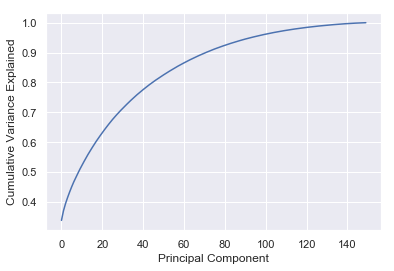

In [10]:
cumVar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumVar)
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Principal Component")

In [11]:
# Keep only the principal components that cumulatively explain at 90% of the variance
imptPCs = pcs[:len(cumVar[cumVar <= .9])]
principalComponentDf = principalComponentDf.loc[:, imptPCs]
#principalComponentDf.head()

In [12]:
# For visualization keep 2 principal components
print(pca.explained_variance_ratio_[0:2]) #variance explained by first two PCs

#x = ctdf.loc[:, ~ctdf.columns.isin(['SubjectId', 'Age'])]
firstTwoPCs = pd.DataFrame(data = pca.components_[:,:2], columns = ['PC1', 'PC2'])
pcScores = pd.DataFrame(data = np.dot(x, firstTwoPCs), columns = ['PC1', 'PC2'])
ages = ctdf.loc[:,['Age']].reset_index()
pcScores = pd.concat([pcScores,ages['Age']], axis = 1)
pcScores.head()


[0.33849745 0.03250256]


,PC1,PC2,Age
0,-1.686873,0.747617,1.0
1,0.035904,0.957288,1.0
2,-0.015094,-0.139675,1.0
3,-0.417279,0.579032,1.0
4,1.634369,0.437767,1.0


C:\Users\mattbeze\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


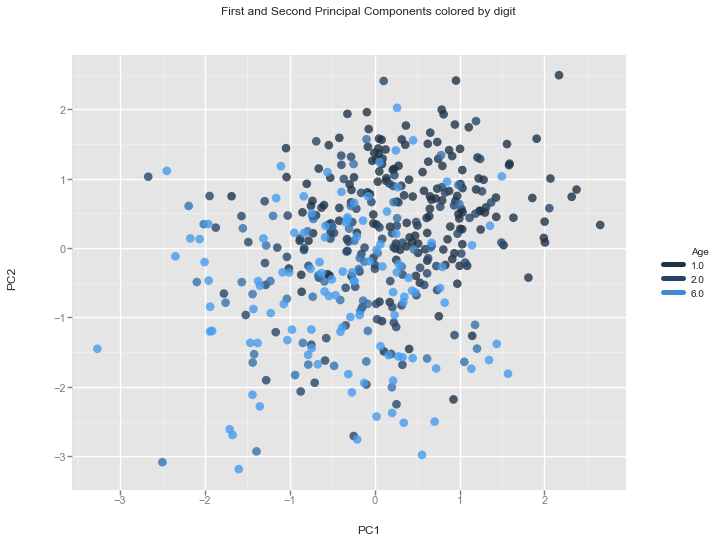

<ggplot: (20387770)>

In [13]:
from ggplot import * 
#from ggplot import scale_fill_brewer

chart = ggplot( pcScores, aes(x='PC1', y='PC2', color='Age') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [14]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features.values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 504.707666
[t-SNE] Error after 100 iterations with early exaggeration: 1.150405
[t-SNE] Error after 175 iterations: 1.160182
t-SNE done! Time elapsed: 4.21700000763 seconds


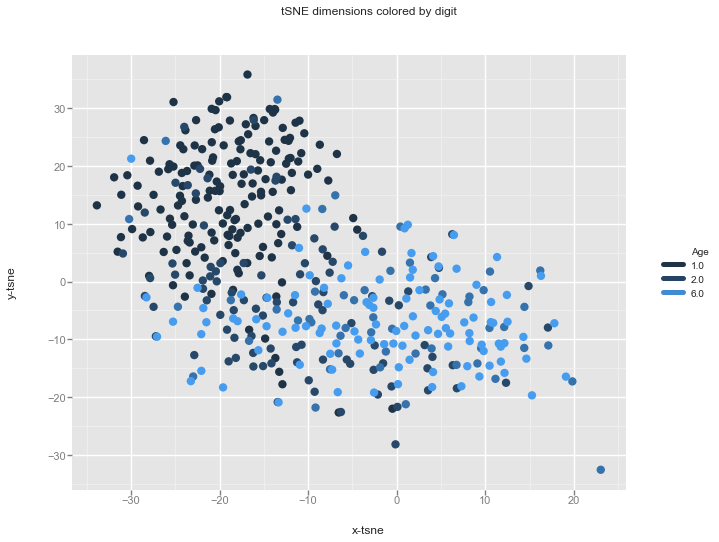

<ggplot: (26248768)>

In [15]:
df_tsne = ctdf.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='Age') ) \
        + geom_point(size=70,alpha=1) \
        + ggtitle("tSNE dimensions colored by digit")
chart